In [2]:
import pandas as pd
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.rename(columns={'Passengers': 'Anzahl_Passagiere'}, inplace=True)
df.head()

,Anzahl_Passagiere
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
fig = px.line(
    df, 
    x=df.index, 
    y='Anzahl_Passagiere', 
    title='Monatliche Flugpassagier-Zahlen (1949-1960)',
    labels={'Month': 'Datum', 'Anzahl_Passagiere': 'Anzahl der Passagiere'}
)

fig.update_layout(title_x=0.5, xaxis_title="Jahr", yaxis_title="Passagiere pro Monat")

fig.show()

**Interpretation des Plots**
Schon auf den ersten Blick erkennen wir drei zentrale Eigenschaften:

- Trend: Es gibt einen klaren, langfristigen Aufwärtstrend. Über die Jahre steigt die Anzahl der Passagiere kontinuierlich an.
- Saisonalität: Es gibt ein starkes, sich jährlich wiederholendes Muster. In jedem Jahr gibt es Spitzen in den Sommermonaten und Täler in den Wintermonaten. Die Periodenlänge s ist also 12.
- Art der Saisonalität: Die saisonalen Schwankungen werden im Laufe der Zeit größer, je höher der Trend wird. Dies deutet auf eine multiplikative Saisonalität hin (die Saisonalität ist ein prozentualer Anteil des Trends).

**Bezug zur Vorlesung**: Eine Zeitreihe mit Trend und/oder Saisonalität ist per Definition nicht stationär. Dies ist eine entscheidende Erkenntnis für die weitere Modellierung.

___

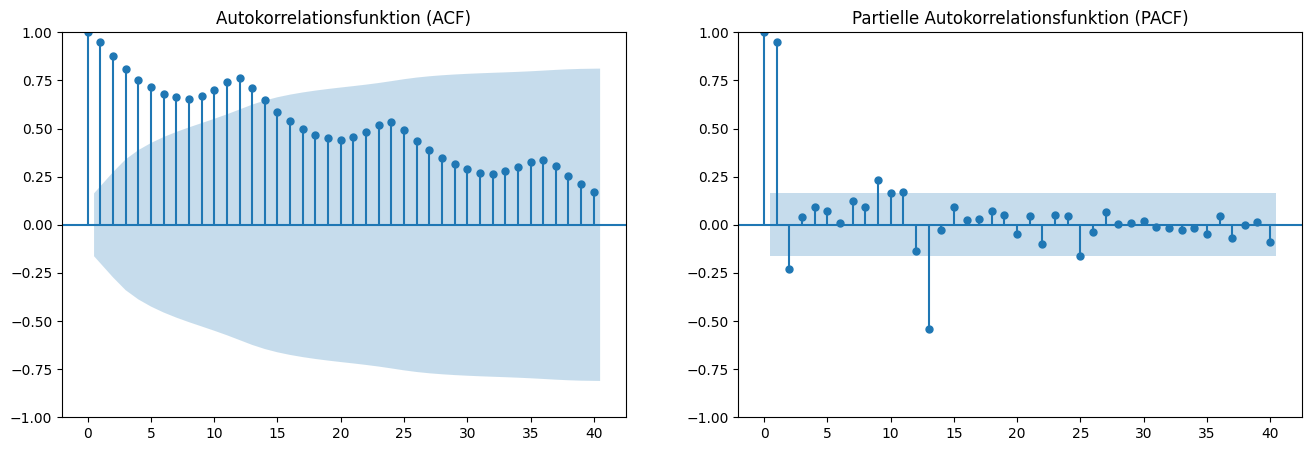

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF Plot
# lags=40 zeigt die Korrelationen für die ersten 40 Monate an
plot_acf(df['Anzahl_Passagiere'], lags=40, ax=axes[0])
axes[0].set_title('Autokorrelationsfunktion (ACF)')

# PACF Plot
plot_pacf(df['Anzahl_Passagiere'], lags=40, ax=axes[1])
axes[1].set_title('Partielle Autokorrelationsfunktion (PACF)')

plt.show()